In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wildfires/3- share-of-the-total-land-area-burnt-by-wildfires-each-year.csv
/kaggle/input/wildfires/2- annual-area-burnt-by-wildfires.csv
/kaggle/input/wildfires/5- annual-burned-area-by-landcover.csv
/kaggle/input/wildfires/4- annual-area-burnt-per-wildfire.csv
/kaggle/input/wildfires/1- cumulative-area-burnt-by-wildfires-by-week.csv


In [2]:
df_main = pd.read_csv("/kaggle/input/wildfires/2- annual-area-burnt-by-wildfires.csv")
df_main.head()

,Entity,Code,Year,Annual area burnt by wildfires
0,Afghanistan,AFG,2012,10430
1,Afghanistan,AFG,2013,5892
2,Afghanistan,AFG,2014,5134
3,Afghanistan,AFG,2015,4084
4,Afghanistan,AFG,2016,9681


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entity                          3354 non-null   object
 1   Code                            3276 non-null   object
 2   Year                            3354 non-null   int64 
 3   Annual area burnt by wildfires  3354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 104.9+ KB


In [4]:
df_main.isnull().sum()

Entity                             0
Code                              78
Year                               0
Annual area burnt by wildfires     0
dtype: int64

In [5]:
df_main.duplicated().sum()

0

In [6]:
df_main.describe()

,Year,Annual area burnt by wildfires
count,3354.000000,3.354000e+03
mean,2018.000000,4.368101e+06
std,3.742215,2.857829e+07
min,2012.000000,0.000000e+00
25%,2015.000000,0.000000e+00
50%,2018.000000,9.253000e+03
75%,2021.000000,3.806550e+05
max,2024.000000,4.435116e+08


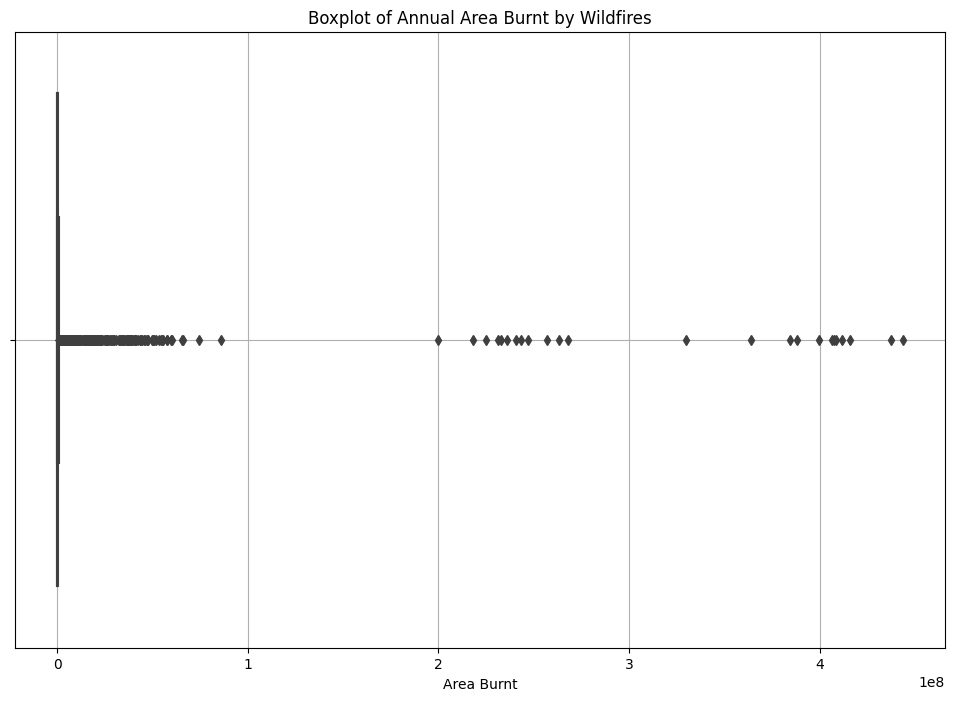

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x=df_main['Annual area burnt by wildfires'])
plt.title('Boxplot of Annual Area Burnt by Wildfires')
plt.xlabel('Area Burnt')
plt.grid(True)
plt.show()

In [8]:
df_main.rename(columns={'Annual area burnt by wildfires': 'Area_Burnt'}, inplace=True)
df_main.tail()

,Entity,Code,Year,Area_Burnt
3349,Zimbabwe,ZWE,2020,1221719
3350,Zimbabwe,ZWE,2021,2113478
3351,Zimbabwe,ZWE,2022,3018840
3352,Zimbabwe,ZWE,2023,2385610
3353,Zimbabwe,ZWE,2024,6684


In [9]:
df_main['Area_Burnt_Log'] = np.log1p(df_main['Area_Burnt'])
df_main.head()

,Entity,Code,Year,Area_Burnt,Area_Burnt_Log
0,Afghanistan,AFG,2012,10430,9.252537
1,Afghanistan,AFG,2013,5892,8.681520
2,Afghanistan,AFG,2014,5134,8.543835
3,Afghanistan,AFG,2015,4084,8.315077
4,Afghanistan,AFG,2016,9681,9.178024


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


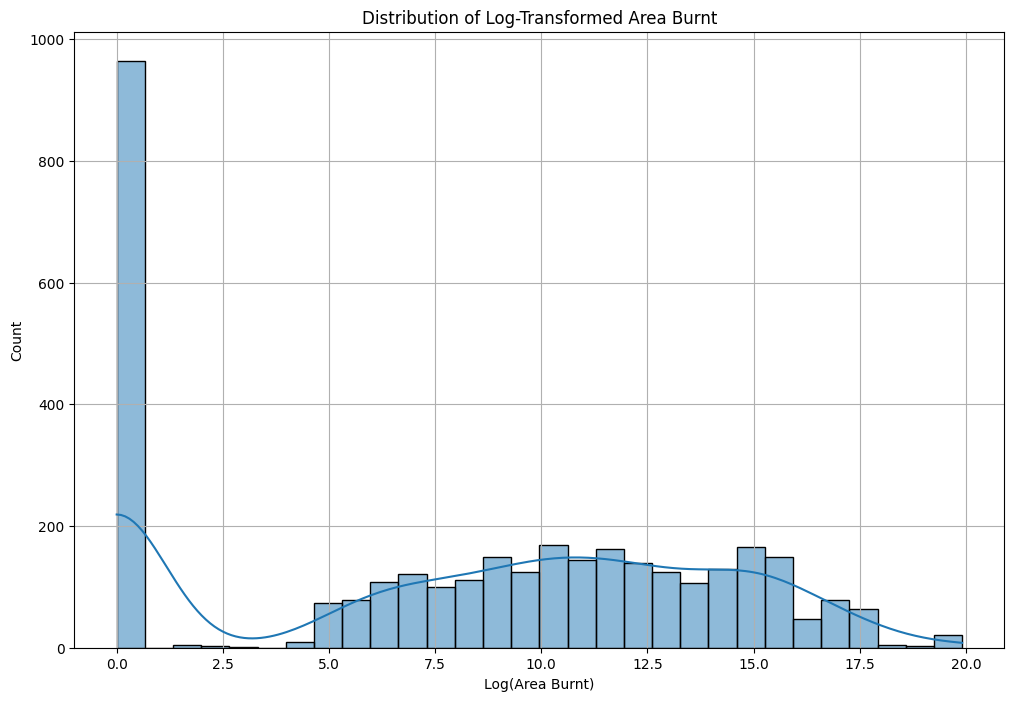

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(df_main['Area_Burnt_Log'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Area Burnt')
plt.xlabel('Log(Area Burnt)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


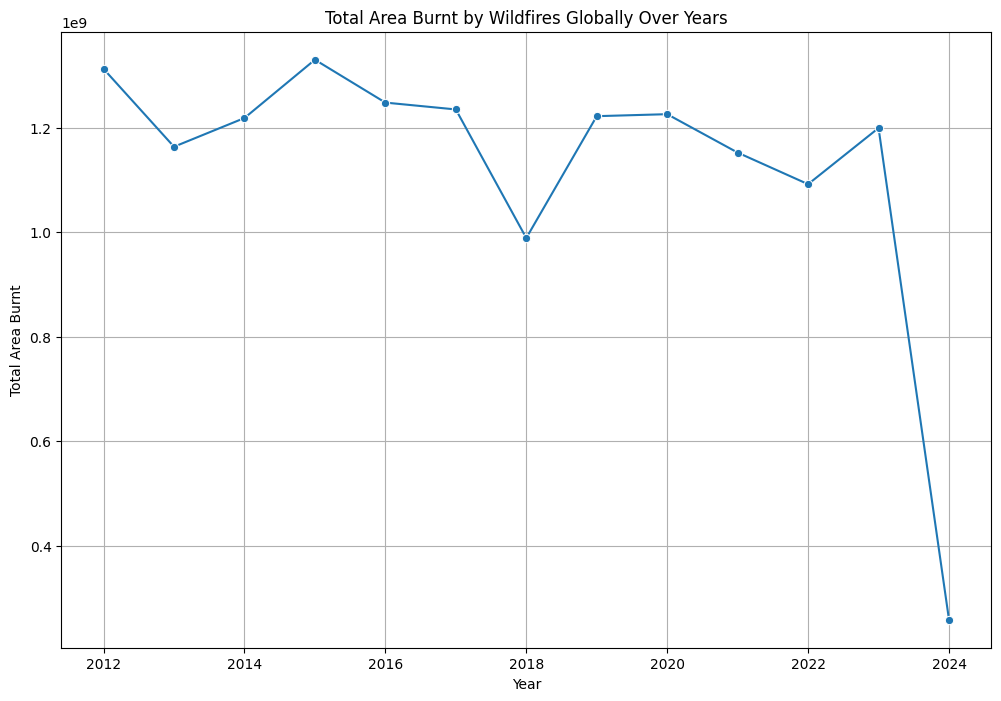

In [11]:
global_yearly = df_main.groupby('Year')['Area_Burnt'].sum().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(data=global_yearly, x='Year', y='Area_Burnt', marker='o')
plt.title('Total Area Burnt by Wildfires Globally Over Years')
plt.xlabel("Year")
plt.ylabel("Total Area Burnt")
plt.grid(True)
plt.show()

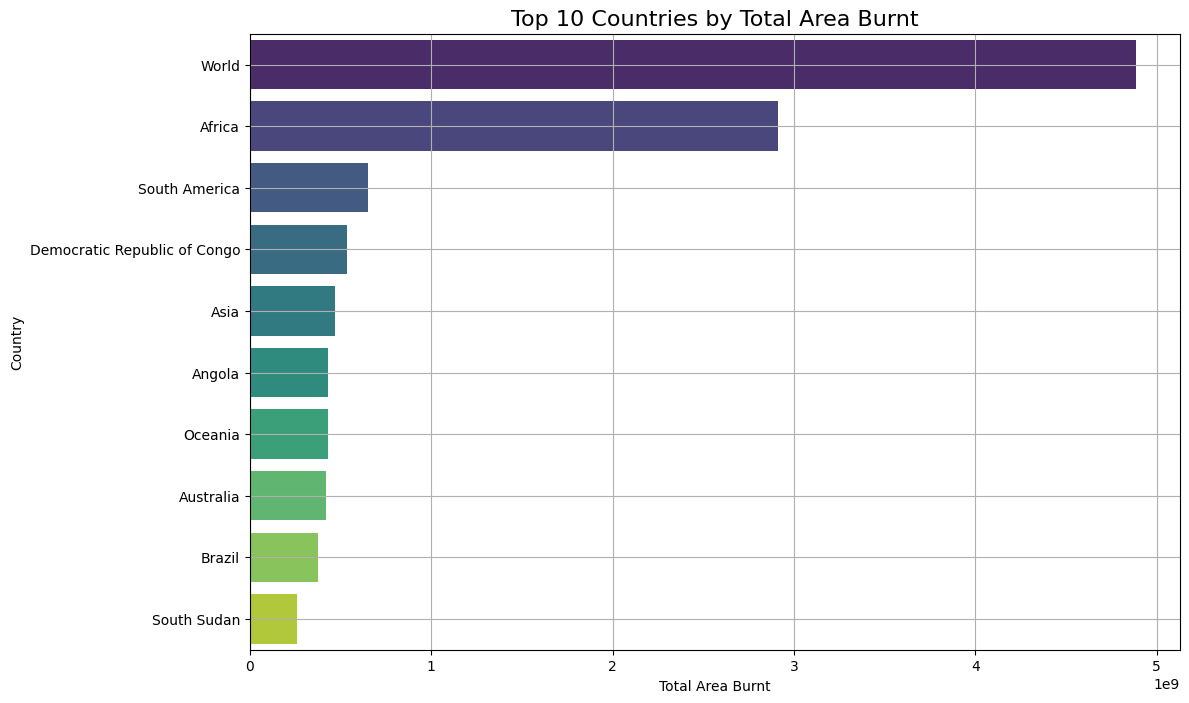

In [12]:
top_countries = df_main.groupby('Entity')['Area_Burnt'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis' )
plt.title('Top 10 Countries by Total Area Burnt', fontsize=16)
plt.xlabel('Total Area Burnt')
plt.ylabel('Country')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


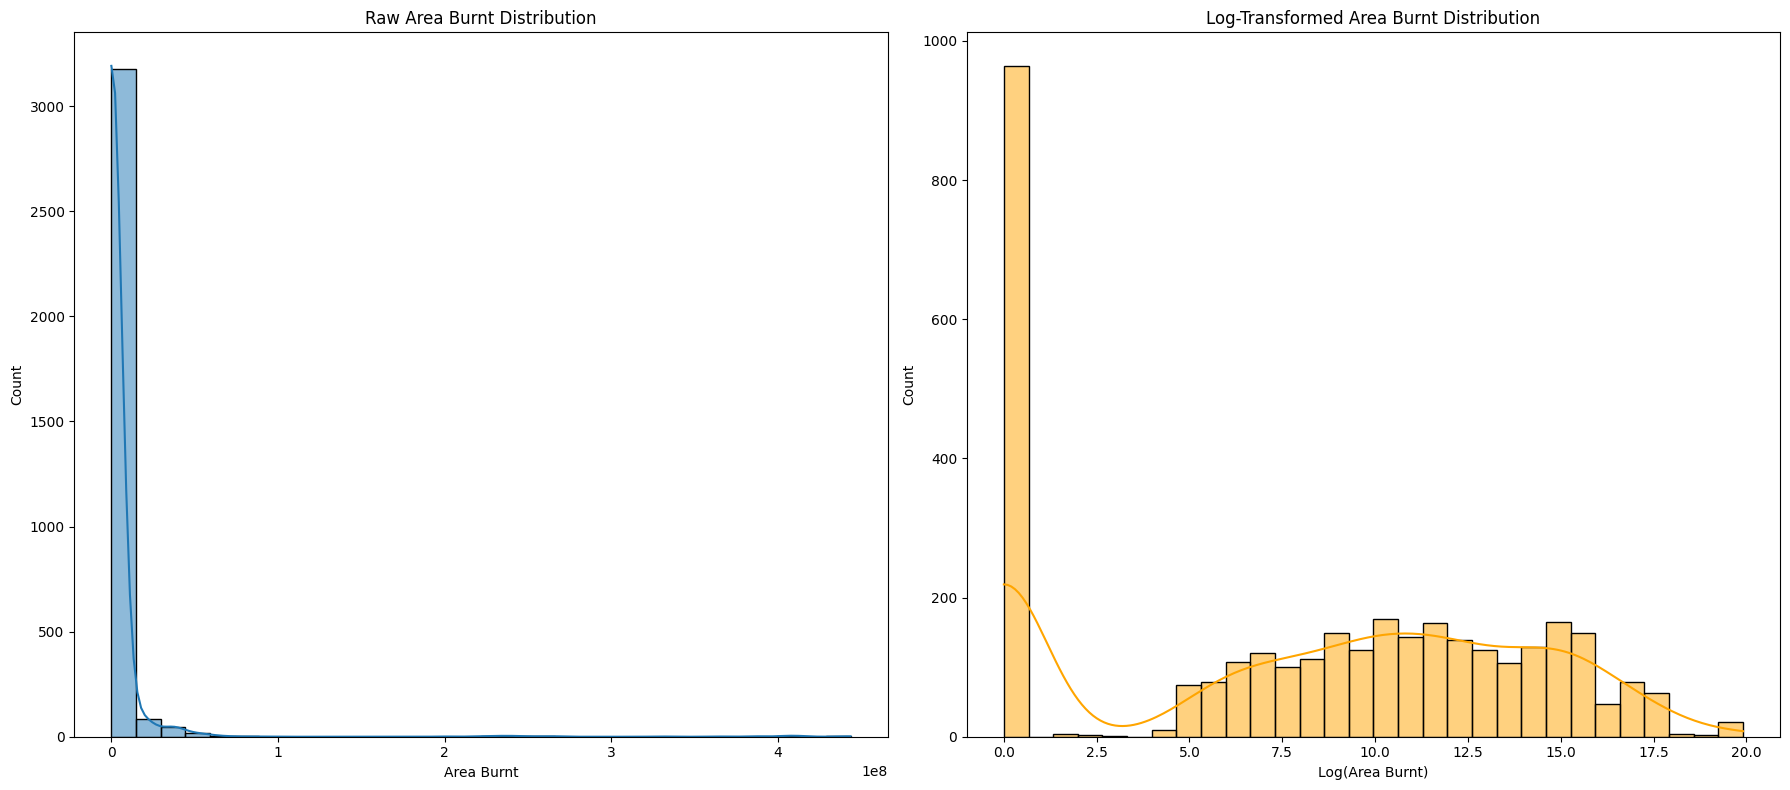

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

sns.histplot(df_main['Area_Burnt'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Raw Area Burnt Distribution')
axes[0].set_xlabel('Area Burnt')

sns.histplot(df_main['Area_Burnt_Log'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Log-Transformed Area Burnt Distribution')
axes[1].set_xlabel('Log(Area Burnt)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

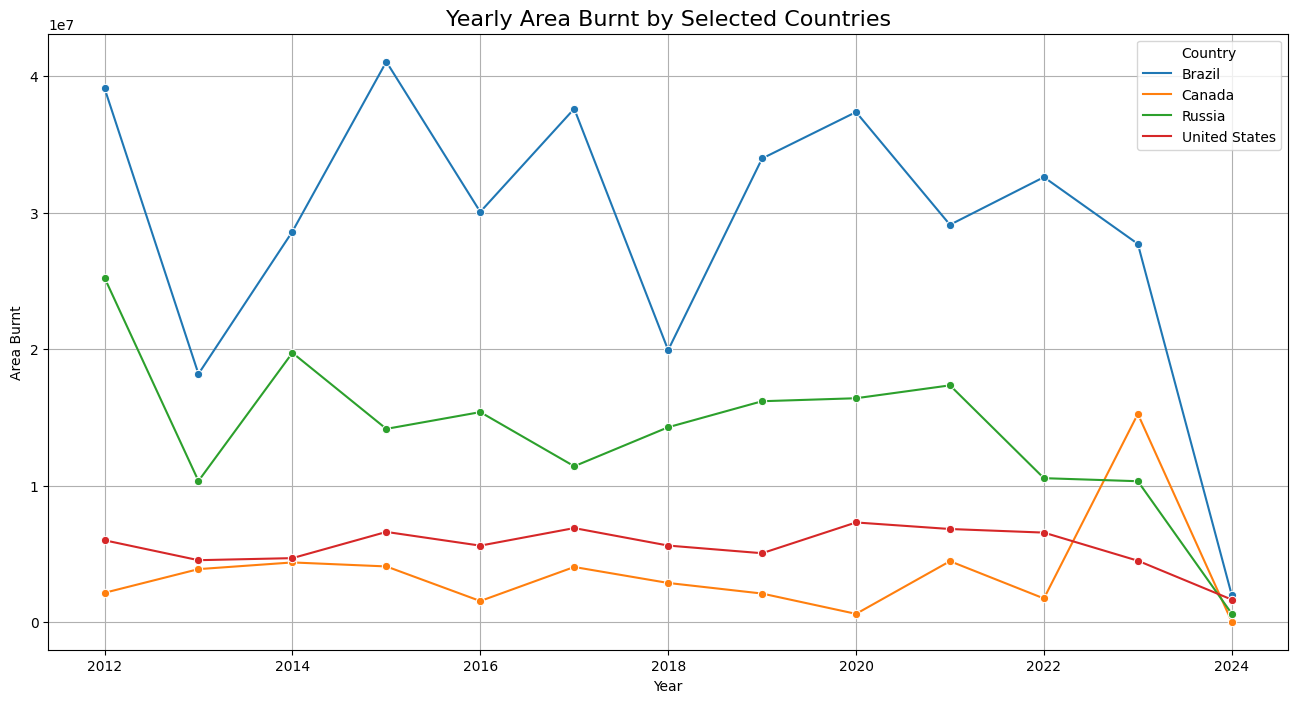

In [14]:
selected_countries = ['United States', 'Austraila', 'Canada', 'Brazil', 'Russia']

selected_df = df_main[df_main['Entity'].isin(selected_countries)]

plt.figure(figsize=(16,8))
sns.lineplot(data=selected_df, x='Year', y='Area_Burnt', hue='Entity', marker='o')
plt.title('Yearly Area Burnt by Selected Countries', fontsize=16)
plt.xlabel('Year')
plt.ylabel("Area Burnt")
plt.grid(True)
plt.legend(title='Country')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


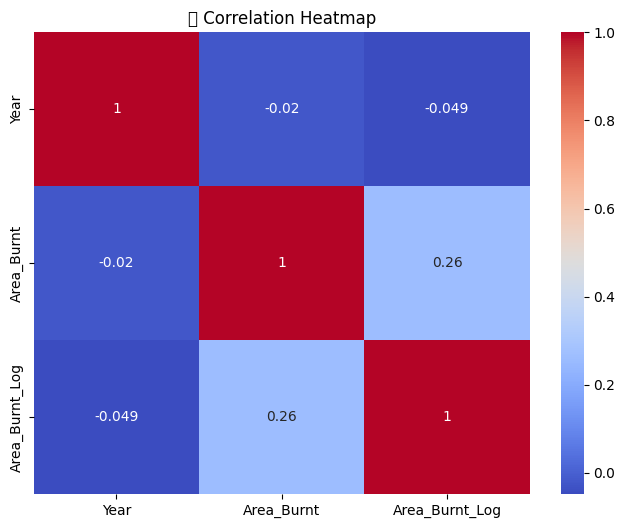

In [15]:
# Correlation matrix
corr = df_main[['Year', 'Area_Burnt', 'Area_Burnt_Log']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('📈 Correlation Heatmap')
plt.show()


In [16]:
X = df_main[['Year']]
y = df_main['Area_Burnt_Log']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred= model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:  {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error:  35.17640259162737
R2 Score: 0.00021810534774757695


In [19]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')

Random Forest Mean Squared Error: 35.452279967516446
Random Forest R2 Score: -0.007622867157602409


In [20]:

df_main['Decade'] = (df_main['Year'] // 10) * 10
print("✅ 'Decade' feature created.")


bins = [-1, 1000, 100000, float('inf')]
labels = ['Small', 'Medium', 'Large']


df_main['Area_Burnt_Category'] = pd.cut(df_main['Area_Burnt'], bins=bins, labels=labels)
print("✅ 'Area_Burnt_Category' feature created.")


continent_map = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    # Europe
    'Russia': 'Europe',
    'Spain': 'Europe',
    'Portugal': 'Europe',
    'France': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Turkey': 'Europe',
    # Africa
    'South Africa': 'Africa',
    'Mali': 'Africa',
    'Democratic Republic of Congo': 'Africa',
    'Angola': 'Africa',
    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    # Asia
    'China': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Afghanistan': 'Asia',
    'Pakistan': 'Asia',
    'Kazakhstan': 'Asia',
    # Middle East
    'Israel': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
}


df_main['Continent'] = df_main['Entity'].map(continent_map)
print("✅ 'Continent' feature created (partial mapping).")


df_main.head()


✅ 'Decade' feature created.
✅ 'Area_Burnt_Category' feature created.
✅ 'Continent' feature created (partial mapping).


,Entity,Code,Year,Area_Burnt,Area_Burnt_Log,Decade,Area_Burnt_Category,Continent
0,Afghanistan,AFG,2012,10430,9.252537,2010,Medium,Asia
1,Afghanistan,AFG,2013,5892,8.681520,2010,Medium,Asia
2,Afghanistan,AFG,2014,5134,8.543835,2010,Medium,Asia
3,Afghanistan,AFG,2015,4084,8.315077,2010,Medium,Asia
4,Afghanistan,AFG,2016,9681,9.178024,2010,Medium,Asia


In [21]:
print(df_main['Area_Burnt_Category'].value_counts())

print(df_main['Continent'].value_counts())


Area_Burnt_Category
Small     1291
Large     1134
Medium     929
Name: count, dtype: int64
Continent
Europe           91
Asia             78
Africa           52
South America    52
North America    39
Middle East      39
Oceania          26
Name: count, dtype: int64


In [22]:
df_main['Area_Burnt'].describe()


count    3.354000e+03
mean     4.368101e+06
std      2.857829e+07
min      0.000000e+00
25%      0.000000e+00
50%      9.253000e+03
75%      3.806550e+05
max      4.435116e+08
Name: Area_Burnt, dtype: float64

In [23]:
bins = [-1, 5, 10, 15, 25]
labels = ['Very Small', 'Small', 'Medium', 'Large']


df_main['Area_Burnt_Category'] = pd.cut(df_main['Area_Burnt'], bins=bins, labels=labels)

print(df_main['Area_Burnt_Category'].value_counts())


Area_Burnt_Category
Very Small    967
Medium          3
Small           1
Large           1
Name: count, dtype: int64


In [24]:
df_encoded = pd.get_dummies(df_main, columns=['Continent', 'Area_Burnt_Category'], drop_first=True)

X = df_encoded[['Year', 'Decade'] + [col for col in df_encoded.columns if col.startswith('Continent_') or col.startswith('Area_Burnt_Category_')]]
y = df_encoded['Area_Burnt_Log']


X.head()


,Year,Decade,Continent_Asia,Continent_Europe,Continent_Middle East,Continent_North America,Continent_Oceania,Continent_South America,Area_Burnt_Category_Small,Area_Burnt_Category_Medium,Area_Burnt_Category_Large
0,2012,2010,True,False,False,False,False,False,False,False,False
1,2013,2010,True,False,False,False,False,False,False,False,False
2,2014,2010,True,False,False,False,False,False,False,False,False
3,2015,2010,True,False,False,False,False,False,False,False,False
4,2016,2010,True,False,False,False,False,False,False,False,False


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.4f}")
print(f"Linear Regression - R² Score: {r2_lr:.4f}")


Linear Regression - MSE: 31.4071
Linear Regression - R² Score: 0.1073


In [27]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.4f}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")


Random Forest - MSE: 32.1029
Random Forest - R² Score: 0.0876


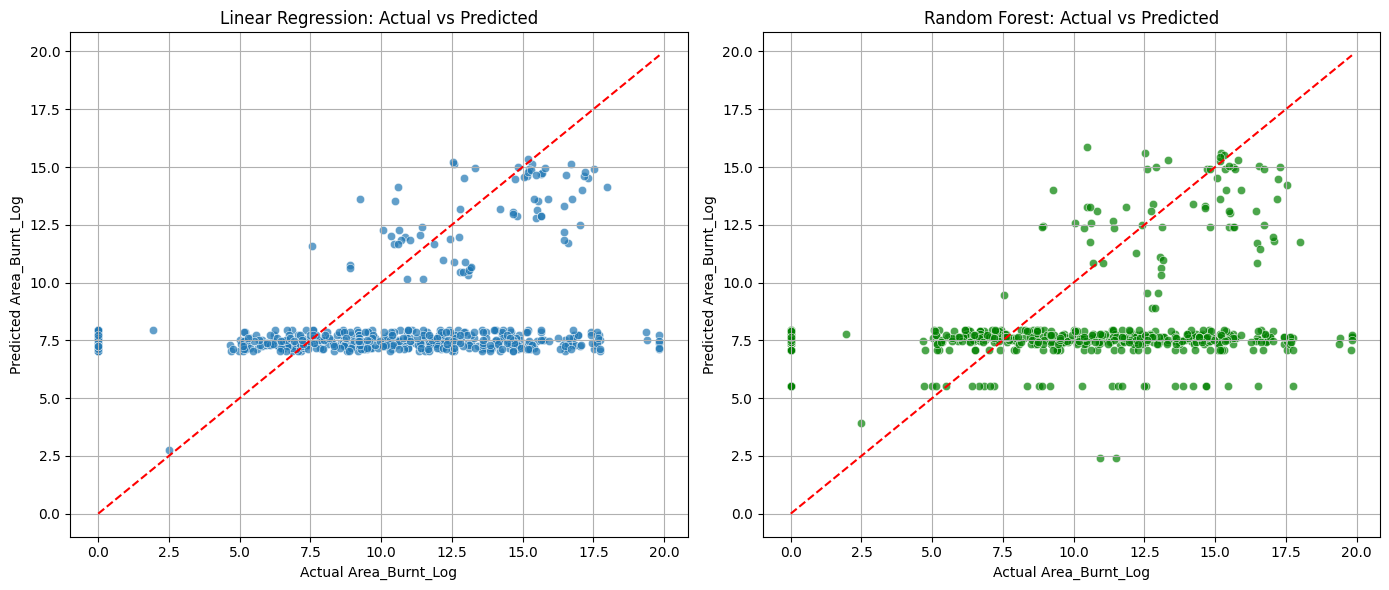

In [28]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Area_Burnt_Log')
plt.ylabel('Predicted Area_Burnt_Log')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Area_Burnt_Log')
plt.ylabel('Predicted Area_Burnt_Log')
plt.grid(True)


plt.tight_layout()
plt.show()


In [29]:
df_main.to_csv('wildfire_final_dataset.csv', index=False)
print("✅ Dataset saved as 'wildfire_final_dataset.csv'")


✅ Dataset saved as 'wildfire_final_dataset.csv'


In [30]:
import joblib


joblib.dump(model_lr, 'linear_regression_model.pkl')


joblib.dump(model_rf, 'random_forest_model.pkl')

print("✅ Models saved as 'linear_regression_model.pkl' and 'random_forest_model.pkl'")


✅ Models saved as 'linear_regression_model.pkl' and 'random_forest_model.pkl'
